In [1]:
import os 
import pandas as pd
import ast
import json
import glob
from collections import Counter

In [2]:
df = pd.read_csv("processed_lbl21_no_enc (2).csv")
df.head()

,Job Category,text,cleaned,hs_skills,label,freq,nlabels
0,FMCG Jobs In Ghana 2022,"""Enjoying together around good food"" defines t...",enjoy good food define essence gbfood group br...,"{'Job Scheduling (Batch Processing)', 'Demonst...",FMCG,18,Other
1,IT Jobs In Ghana 2022,Our Client is a high-growth startup and a mark...,client highgrowth startup market leader build ...,"{'Agile Product Development', 'Experience Desi...",IT,1513,IT
2,Securtity/Law Enforcement Jobs In Ghana 2022,Moove is on a mission to build the largest mob...,moove mission build large mobility fintech eme...,"{'Accident Reporting', 'Vehicle Recovery', 'La...",Securtity/Law Enforcement,185,Securtity/Law Enforcement
3,Education Jobs In Ghana 2022,De Youngsterâs International School is seeki...,de youngster international school seek recruit...,{'Substance Abuse'},Education,805,Education
4,NGO Jobs In Ghana 2022,FHI 360 is a global development organization w...,fhi global development organization rigorous e...,"{'Activity Manager', 'Systems Design', 'System...",Administrative/Secretarial,2409,Administrative/Secretarial


In [3]:
group= df.groupby('nlabels')

In [4]:
def group_hard(cat):
  hardsk =[]
  for el in cat['hs_skills']:
    try:
      element = list(ast.literal_eval(el))
      hardsk += element
    except:
      pass
  c = Counter(hardsk).most_common(1000) # this nuber define the top 10 or 20 based on the need
  return c
  # return hardsk

In [5]:
group_lst=[]
for g,data in group:
  group_lst.append((g,list(group_hard(data))))

In [6]:
#pd.set_option('display.max_colwidth', None)

In [7]:
group_df = pd.DataFrame(group_lst)
group_df

,0,1
0,Accounting/Finance/Banking,"[(Risk Management, 319), (Job Descriptions, 30..."
1,Administrative/Secretarial,"[(Project Management, 413), (Job Descriptions,..."
2,Advertising/Media,"[(Graphic Design, 45), (Digital Marketing, 36)..."
3,Agricultural,"[(Value Chain, 58), (Development Support, 36),..."
4,Communication,"[(Communication Strategies, 95), (Public Relat..."
5,Customer Service,"[(Customer Experience, 52), (Customer Satisfac..."
6,Education,"[(Job Descriptions, 112), (Acceptance and Comm..."
7,"Energy,Oil & Gas","[(Job Descriptions, 56), (Management Systems, ..."
8,Engineering/Processing/Manufacturing,"[(Underground Mining, 249), (Project Managemen..."
9,Healthcare,"[(Public Health, 103), (Job Descriptions, 99),..."


In [8]:
group_df.rename(columns = {0:'Job_Category', 1:'Top_Skills'}, inplace = True)

In [9]:
group_df['Top_Skills'] = group_df['Top_Skills'].apply(lambda x: str(x).strip('[]').replace('(', '').replace(')', '').replace("'", ""))


In [10]:
import re

group_df['Top_Skills'] = group_df['Top_Skills'].apply(lambda x: re.sub(r'\d+', '', x))

group_df['Top_Skills'] = group_df['Top_Skills'].apply(lambda x: re.sub(r',\s*,', ',', x))


In [11]:
group_df.head(2)

,Job_Category,Top_Skills
0,Accounting/Finance/Banking,"Risk Management, Job Descriptions, Internal Co..."
1,Administrative/Secretarial,"Project Management, Job Descriptions, Acceptan..."


In [12]:
group_df.Top_Skills = group_df.Top_Skills.str.lower()

group_df

,Job_Category,Top_Skills
0,Accounting/Finance/Banking,"risk management, job descriptions, internal co..."
1,Administrative/Secretarial,"project management, job descriptions, acceptan..."
2,Advertising/Media,"graphic design, digital marketing, project man..."
3,Agricultural,"value chain, development support, agricultural..."
4,Communication,"communication strategies, public relations, pr..."
5,Customer Service,"customer experience, customer satisfaction, jo..."
6,Education,"job descriptions, acceptance and commitment th..."
7,"Energy,Oil & Gas","job descriptions, management systems, operatio..."
8,Engineering/Processing/Manufacturing,"underground mining, project management, mechan..."
9,Healthcare,"public health, job descriptions, health facili..."


In [13]:
IT = group_df.loc[12]

In [14]:
IT

Job_Category                                                  IT 
Top_Skills      computer science, project management, software...
Name: 12, dtype: object

In [15]:
it = pd.DataFrame(IT)

In [16]:
it

,12
Job_Category,IT
Top_Skills,"computer science, project management, software..."


In [17]:
words = group_df.loc[12, 'Top_Skills']

In [18]:
words

'computer science, project management, software development, information systems, job descriptions, technical support, acceptance and commitment therapy act, software engineering, financial information exchange fix protocol, hypertext markup language html, business requirements, management systems, service provider, operating systems, cascading style sheets css, application development, service delivery, computer engineering, development management, risk management, business process, job interviews, disaster recovery, computer systems, financial services, web development, web applications, customer experience, development support, user experience, change management, analytical thinking, network security, stakeholder management, experience design, cultural diversity, application programming interface api, fourgen computer-aided software engineering case tools, graphic design, conflict management, network infrastructure, process improvements, product management, customer satisfaction, pe

In [19]:
dff = pd.read_csv('Curriculum Skills.csv')
dff

,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering,Agicultural Engineering
0,KNUST,"Visual Basic (Programming Language), Systems A...",NaN,NaN,NaN,NaN,NaN
1,University of Mines and Technology,"Computational Logic, Network Communications, M...",NaN,NaN,NaN,NaN,NaN
2,UNIVERSITY OF GHANA,"Management Systems, Network Communications, Ge...","Computer Hardware, Systems Design, Management ...",Algebra Basic Mechanics I General hemistry...,"Systems Design, Engineering Statistics, Indust...",NaN,"Animal Production, Engineering Statistics, Flu..."
3,Ashei University Ghana,"Algorithm Design, Systems Design, Multivariabl...",NaN,NaN,"System Dynamics, Systems Design, Engineering S...","System Dynamics, Systems Design, Engineering S...",NaN
4,Ghana Institute of Management,"Computer Graphics, Computational Mathematics, ...",NaN,NaN,NaN,NaN,NaN


In [20]:
dff = dff.fillna('')


In [21]:
dff = dff.apply(lambda x: x.astype(str).str.lower())
dff

,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering,Agicultural Engineering
0,knust,"visual basic (programming language), systems a...",,,,,
1,university of mines and technology,"computational logic, network communications, m...",,,,,
2,university of ghana,"management systems, network communications, ge...","computer hardware, systems design, management ...",algebra basic mechanics i general hemistry...,"systems design, engineering statistics, indust...",,"animal production, engineering statistics, flu..."
3,ashei university ghana,"algorithm design, systems design, multivariabl...",,,"system dynamics, systems design, engineering s...","system dynamics, systems design, engineering s...",
4,ghana institute of management,"computer graphics, computational mathematics, ...",,,,,


In [22]:
Comp = dff[['Name of Institution', 'Computer Science']]

In [23]:
Comp['Computer Science'] = Comp['Computer Science'].str.replace(r'[\(\)]', '')

Comp

/var/folders/r4/53zckx1d6f10fr95h3tjpmfr0000gn/T/ipykernel_18501/990061237.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Comp['Computer Science'] = Comp['Computer Science'].str.replace(r'[\(\)]', '')
/var/folders/r4/53zckx1d6f10fr95h3tjpmfr0000gn/T/ipykernel_18501/990061237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comp['Computer Science'] = Comp['Computer Science'].str.replace(r'[\(\)]', '')


,Name of Institution,Computer Science
0,knust,"visual basic programming language, systems ana..."
1,university of mines and technology,"computational logic, network communications, m..."
2,university of ghana,"management systems, network communications, ge..."
3,ashei university ghana,"algorithm design, systems design, multivariabl..."
4,ghana institute of management,"computer graphics, computational mathematics, ..."


In [24]:
Comp

,Name of Institution,Computer Science
0,knust,"visual basic programming language, systems ana..."
1,university of mines and technology,"computational logic, network communications, m..."
2,university of ghana,"management systems, network communications, ge..."
3,ashei university ghana,"algorithm design, systems design, multivariabl..."
4,ghana institute of management,"computer graphics, computational mathematics, ..."


In [25]:
CU = Comp.loc[0, 'Computer Science']
CU

'visual basic programming language, systems analysis, assembly language, digital electronics, economics, programming music, discrete mathematics, electronics, analogue electronics, technical communication, operating systems, c programming language, java programming language, object-oriented programming oop'

In [26]:
it[12]

Job_Category                                                  IT 
Top_Skills      computer science, project management, software...
Name: 12, dtype: object

In [27]:
it

,12
Job_Category,IT
Top_Skills,"computer science, project management, software..."


In [28]:
Comp

,Name of Institution,Computer Science
0,knust,"visual basic programming language, systems ana..."
1,university of mines and technology,"computational logic, network communications, m..."
2,university of ghana,"management systems, network communications, ge..."
3,ashei university ghana,"algorithm design, systems design, multivariabl..."
4,ghana institute of management,"computer graphics, computational mathematics, ..."


In [29]:
IT

Job_Category                                                  IT 
Top_Skills      computer science, project management, software...
Name: 12, dtype: object

In [30]:
CU

'visual basic programming language, systems analysis, assembly language, digital electronics, economics, programming music, discrete mathematics, electronics, analogue electronics, technical communication, operating systems, c programming language, java programming language, object-oriented programming oop'

In [31]:
words

'computer science, project management, software development, information systems, job descriptions, technical support, acceptance and commitment therapy act, software engineering, financial information exchange fix protocol, hypertext markup language html, business requirements, management systems, service provider, operating systems, cascading style sheets css, application development, service delivery, computer engineering, development management, risk management, business process, job interviews, disaster recovery, computer systems, financial services, web development, web applications, customer experience, development support, user experience, change management, analytical thinking, network security, stakeholder management, experience design, cultural diversity, application programming interface api, fourgen computer-aided software engineering case tools, graphic design, conflict management, network infrastructure, process improvements, product management, customer satisfaction, pe

In [32]:
CU

'visual basic programming language, systems analysis, assembly language, digital electronics, economics, programming music, discrete mathematics, electronics, analogue electronics, technical communication, operating systems, c programming language, java programming language, object-oriented programming oop'

In [33]:
CU_list = [word.strip() for word in CU.split(',')]
words_list = [word.strip() for word in words.split(',')]

# Loop through each word in CU and count the number of matches in words
for word in CU_list:
    #count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list), flags=re.IGNORECASE))
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list)))
    print('{}: {}'.format(word, count))

visual basic programming language: 1
systems analysis: 1
assembly language: 0
digital electronics: 0
economics: 0
programming music: 0
discrete mathematics: 0
electronics: 0
analogue electronics: 0
technical communication: 1
operating systems: 1
c programming language: 0
java programming language: 0
object-oriented programming oop: 1


In [34]:
CU_list = [word.strip() for word in CU.split(',')]
words_list = [word.strip() for word in words.split(',')]

# Loop through each word in CU and count the number of matches in words
total_count = 0
for word in CU_list:
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list)))
    #print('{}: {}'.format(word, count))
    total_count += count

# Print the total count
print('Total count: {}'.format(total_count))

Total count: 5


In [35]:
dff

,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering,Agicultural Engineering
0,knust,"visual basic (programming language), systems a...",,,,,
1,university of mines and technology,"computational logic, network communications, m...",,,,,
2,university of ghana,"management systems, network communications, ge...","computer hardware, systems design, management ...",algebra basic mechanics i general hemistry...,"systems design, engineering statistics, indust...",,"animal production, engineering statistics, flu..."
3,ashei university ghana,"algorithm design, systems design, multivariabl...",,,"system dynamics, systems design, engineering s...","system dynamics, systems design, engineering s...",
4,ghana institute of management,"computer graphics, computational mathematics, ...",,,,,


In [36]:
dff['Computer Science'] = dff['Computer Science'].str.replace(r'[\(\)]', '')
dff

/var/folders/r4/53zckx1d6f10fr95h3tjpmfr0000gn/T/ipykernel_18501/1402056997.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dff['Computer Science'] = dff['Computer Science'].str.replace(r'[\(\)]', '')


,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering,Agicultural Engineering
0,knust,"visual basic programming language, systems ana...",,,,,
1,university of mines and technology,"computational logic, network communications, m...",,,,,
2,university of ghana,"management systems, network communications, ge...","computer hardware, systems design, management ...",algebra basic mechanics i general hemistry...,"systems design, engineering statistics, indust...",,"animal production, engineering statistics, flu..."
3,ashei university ghana,"algorithm design, systems design, multivariabl...",,,"system dynamics, systems design, engineering s...","system dynamics, systems design, engineering s...",
4,ghana institute of management,"computer graphics, computational mathematics, ...",,,,,


In [37]:
#dff.set_index('Name of Institution', inplace=True)

In [38]:
dff

,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering,Agicultural Engineering
0,knust,"visual basic programming language, systems ana...",,,,,
1,university of mines and technology,"computational logic, network communications, m...",,,,,
2,university of ghana,"management systems, network communications, ge...","computer hardware, systems design, management ...",algebra basic mechanics i general hemistry...,"systems design, engineering statistics, indust...",,"animal production, engineering statistics, flu..."
3,ashei university ghana,"algorithm design, systems design, multivariabl...",,,"system dynamics, systems design, engineering s...","system dynamics, systems design, engineering s...",
4,ghana institute of management,"computer graphics, computational mathematics, ...",,,,,


In [39]:
UM = Comp.loc[1, 'Computer Science']
UM

'computational logic, network communications, mechanism design, industry practices, algebra, digital electronics, programming music, parallel computing, data warehousing, calculus, computer vision, artificial intelligence, database design, image processing, mechanical engineering, electricity, biomechanics, fluid mechanics, software development, computer graphics, probability, engineering drawings, operating systems, mechanical systems, database management systems, biomedical engineering, system software, data structures, computer systems, compiler theories, colloidal chemistry, database development, academic writing, management control, expert systems, differential equations, operations research, formal methods, software engineering, embedded systems, technical report, computer networks, design research, entrepreneurship, biotechnology, engineering statistics, compiler design, information theory, accounting, anatomy, medical physics, development management, physics, numerical analysis

In [40]:
UM_list = [word.strip() for word in UM.split(',')]
words_list = [word.strip() for word in words.split(',')]

# Loop through each word in CU and count the number of matches in words
total_count = 0
for word in UM_list:
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list)))
    #print('{}: {}'.format(word, count))
    total_count += count

# Print the total count
print('Total count: {}'.format(total_count))

Total count: 45


In [41]:
UOG = Comp.loc[2, 'Computer Science']
UOG

'management systems, network communications, geometry, computer graphics, probability, computational mathematics, operating systems, c programming language, algebra, accounting, database management systems, digital electronics, physics, programming music, parallel computing, data structures, abstract algebra, system programming, computer systems, calculus, compiler theories, data warehousing, algorithm analysis, statistics, psychology, trigonometry, computer vision, database development, computer science, artificial intelligence, academic writing, algorithms, human-computer interaction, database design, robotics, information systems, expert systems, program development, formal methods, software engineering, embedded systems, african studies, discrete mathematics, formal language, java programming language, multimedia, mechanics'

In [42]:
total_count = 0
KN = Comp.loc[0, 'Computer Science']
KN_list = [word.strip() for word in KN.split(',')]
words_list = [word.strip() for word in words.split(',')]

# Loop through each word in the category and count the number of matches in words
for word in KN_list:
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list)))
    total_count += count

# Find the row with the correct institution name and append the total count to the "Computer Science" column
institution_name = "knust"
row_index = Comp.index[Comp['Name of Institution'] == institution_name][0]
Comp.at[row_index, "Computer Science"] = total_count

In [43]:
total_count = 0
UM = Comp.loc[1, 'Computer Science']
UM_list = [word.strip() for word in UM.split(',')]
words_list = [word.strip() for word in words.split(',')]

# Loop through each word in the category and count the number of matches in words
for word in UM_list:
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list)))
    total_count += count

# Find the row with the correct institution name and append the total count to the "Computer Science" column
institution_name = "university of mines and technology"
row_index = Comp.index[Comp['Name of Institution'] == institution_name][0]
Comp.at[row_index, "Computer Science"] = total_count

In [44]:
total_count = 0
UOG = Comp.loc[2, 'Computer Science']
UOG_list = [word.strip() for word in UOG.split(',')]
words_list = [word.strip() for word in words.split(',')]

# Loop through each word in the category and count the number of matches in words
for word in UOG_list:
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list)))
    total_count += count

# Find the row with the correct institution name and append the total count to the "Computer Science" column
institution_name = "university of ghana"
row_index = Comp.index[Comp['Name of Institution'] == institution_name][0]
Comp.at[row_index, "Computer Science"] = total_count

In [45]:
total_count = 0
AUG = Comp.loc[3, 'Computer Science']
AUG_list = [word.strip() for word in AUG.split(',')]
words_list = [word.strip() for word in words.split(',')]

# Loop through each word in the category and count the number of matches in words
for word in AUG_list:
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list)))
    total_count += count

# Find the row with the correct institution name and append the total count to the "Computer Science" column
institution_name = "ashei university ghana"
row_index = Comp.index[Comp['Name of Institution'] == institution_name][0]
Comp.at[row_index, "Computer Science"] = total_count

In [46]:
#category_name = Comp["Computer Science"]
total_count = 0
GIM = Comp.loc[4, 'Computer Science']
GIM_list = [word.strip() for word in GIM.split(',')]
words_list = [word.strip() for word in words.split(',')]

# Loop through each word in the category and count the number of matches in words
for word in GIM_list:
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list)))
    total_count += count

# Find the row with the correct institution name and append the total count to the "Computer Science" column
institution_name = "ghana institute of management"
row_index = Comp.index[Comp['Name of Institution'] == institution_name][0]
Comp.at[row_index, "Computer Science"] = total_count

In [47]:
Comp

,Name of Institution,Computer Science
0,knust,5
1,university of mines and technology,45
2,university of ghana,32
3,ashei university ghana,28
4,ghana institute of management,31


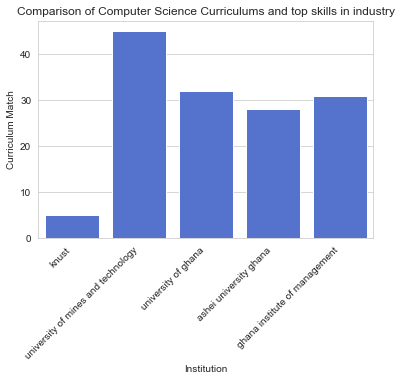

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar chart using Seaborn
sns.set_style('whitegrid')
sns.barplot(x='Name of Institution', y='Computer Science', data=Comp, color='royalblue')
plt.title('Comparison of Computer Science Curriculums and top skills in industry')
plt.xlabel('Institution')
plt.ylabel('Curriculum Match')
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.show()

In [49]:
dff.columns

Index(['Name of Institution', 'Computer Science', 'Information Technology',
       'Agricultural Engineering', 'Computer Engineering',
       'Electrical & Electronic Engineering', 'Agicultural Engineering'],
      dtype='object')

In [50]:
dff

,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering,Agicultural Engineering
0,knust,"visual basic programming language, systems ana...",,,,,
1,university of mines and technology,"computational logic, network communications, m...",,,,,
2,university of ghana,"management systems, network communications, ge...","computer hardware, systems design, management ...",algebra basic mechanics i general hemistry...,"systems design, engineering statistics, indust...",,"animal production, engineering statistics, flu..."
3,ashei university ghana,"algorithm design, systems design, multivariabl...",,,"system dynamics, systems design, engineering s...","system dynamics, systems design, engineering s...",
4,ghana institute of management,"computer graphics, computational mathematics, ...",,,,,


In [51]:
dff.loc[2, 'Agricultural Engineering'] = dff.loc[2, 'Agicultural Engineering']

In [52]:
dff.drop('Agicultural Engineering', axis=1, inplace = True)
dff

,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering
0,knust,"visual basic programming language, systems ana...",,,,
1,university of mines and technology,"computational logic, network communications, m...",,,,
2,university of ghana,"management systems, network communications, ge...","computer hardware, systems design, management ...","animal production, engineering statistics, flu...","systems design, engineering statistics, indust...",
3,ashei university ghana,"algorithm design, systems design, multivariabl...",,,"system dynamics, systems design, engineering s...","system dynamics, systems design, engineering s..."
4,ghana institute of management,"computer graphics, computational mathematics, ...",,,,


In [53]:
dff.loc[2, 'Electrical & Electronic Engineering'] = dff.loc[2, 'Agricultural Engineering']
dff

,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering
0,knust,"visual basic programming language, systems ana...",,,,
1,university of mines and technology,"computational logic, network communications, m...",,,,
2,university of ghana,"management systems, network communications, ge...","computer hardware, systems design, management ...","animal production, engineering statistics, flu...","systems design, engineering statistics, indust...","animal production, engineering statistics, flu..."
3,ashei university ghana,"algorithm design, systems design, multivariabl...",,,"system dynamics, systems design, engineering s...","system dynamics, systems design, engineering s..."
4,ghana institute of management,"computer graphics, computational mathematics, ...",,,,


In [54]:
dff['Information Technology'] = dff['Information Technology'].str.replace(r'[\(\)]', '')
dff['Computer Engineering'] = dff['Computer Engineering'].str.replace(r'[\(\)]', '')
dff['Agricultural Engineering'] = dff['Agricultural Engineering'].str.replace(r'[\(\)]', '')
dff['Electrical & Electronic Engineering'] = dff['Electrical & Electronic Engineering'].str.replace(r'[\(\)]', '')

dff

/var/folders/r4/53zckx1d6f10fr95h3tjpmfr0000gn/T/ipykernel_18501/4179387847.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dff['Information Technology'] = dff['Information Technology'].str.replace(r'[\(\)]', '')
/var/folders/r4/53zckx1d6f10fr95h3tjpmfr0000gn/T/ipykernel_18501/4179387847.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dff['Computer Engineering'] = dff['Computer Engineering'].str.replace(r'[\(\)]', '')
/var/folders/r4/53zckx1d6f10fr95h3tjpmfr0000gn/T/ipykernel_18501/4179387847.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dff['Agricultural Engineering'] = dff['Agricultural Engineering'].str.replace(r'[\(\)]', '')
/var/folders/r4/53zckx1d6f10fr95h3tjpmfr0000gn/T/ipykernel_18501/4179387847.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dff['Electrical & Ele

,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering
0,knust,"visual basic programming language, systems ana...",,,,
1,university of mines and technology,"computational logic, network communications, m...",,,,
2,university of ghana,"management systems, network communications, ge...","computer hardware, systems design, management ...","animal production, engineering statistics, flu...","systems design, engineering statistics, indust...","animal production, engineering statistics, flu..."
3,ashei university ghana,"algorithm design, systems design, multivariabl...",,,"system dynamics, systems design, engineering s...","system dynamics, systems design, engineering s..."
4,ghana institute of management,"computer graphics, computational mathematics, ...",,,,


In [55]:
UOGdf = dff.iloc[2].to_frame().transpose()

UOGdf

,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering
2,university of ghana,"management systems, network communications, ge...","computer hardware, systems design, management ...","animal production, engineering statistics, flu...","systems design, engineering statistics, indust...","animal production, engineering statistics, flu..."


In [56]:
UOGdf.loc[2, 'Information Technology']

'computer hardware, systems design, management systems, information audit, digital media, digital logic, operating systems, network security, web design, computer programming, transmission, accounting, database management systems, extensible markup language xml, content management, programming music, information visualization, human development, statistics, data administration, database administration, information retrieval, digital technology, microeconomics, academic writing, economy, logic systems, human-computer interaction, system administration, program database, resource planning, web development, semantic web, african studies, macroeconomics, storage management, computer networks, content management systems, multimedia, semantic technology'

In [57]:
IOT = UOGdf.loc[2, 'Information Technology']
IOT_list = [word.strip() for word in IOT.split(',')]
words_list = [word.strip() for word in words.split(',')]

# Loop through each word in CU and count the number of matches in words
total_count = 0
for word in IOT_list:
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list)))
    #print('{}: {}'.format(word, count))
    total_count += count

# Print the total count
print('Total count: {}'.format(total_count))

Total count: 30


In [58]:
total_count = 0
IOT = UOGdf.loc[2, 'Information Technology']
IOT_list = [word.strip() for word in IOT.split(',')]
words_list = [word.strip() for word in words.split(',')]

# Loop through each word in the category and count the number of matches in words
for word in IOT_list:
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list)))
    total_count += count

# Find the row with the correct institution name and append the total count to the "Computer Science" column
institution_name = "university of ghana"
row_index = UOGdf.index[UOGdf['Name of Institution'] == institution_name][0]
UOGdf.at[row_index, "Information Technology"] = total_count

In [59]:
Agric = group_df.loc[3, 'Top_Skills']

In [60]:
total_count = 0
AEng = UOGdf.loc[2, 'Agricultural Engineering']
AEng_list = [word.strip() for word in AEng.split(',')]
Agric_list = [word.strip() for word in Agric.split(',')]

# Loop through each word in the category and count the number of matches in words
for word in AEng_list:
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(Agric_list)))
    total_count += count

# Find the row with the correct institution name and append the total count to the "Computer Science" column
institution_name = "university of ghana"
row_index = UOGdf.index[UOGdf['Name of Institution'] == institution_name][0]
UOGdf.at[row_index, "Agricultural Engineering"] = total_count

UOGdf

,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering
2,university of ghana,"management systems, network communications, ge...",30,7,"systems design, engineering statistics, indust...","animal production, engineering statistics, flu..."


In [61]:
total_count = 0
CE = UOGdf.loc[2, 'Computer Engineering']
CE_list = [word.strip() for word in CE.split(',')]
words_list = [word.strip() for word in words.split(',')]

# Loop through each word in the category and count the number of matches in words
for word in CE_list:
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list)))
    total_count += count

# Find the row with the correct institution name and append the total count to the "Computer Science" column
institution_name = "university of ghana"
row_index = UOGdf.index[UOGdf['Name of Institution'] == institution_name][0]
UOGdf.at[row_index, "Computer Engineering"] = total_count

UOGdf

,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering
2,university of ghana,"management systems, network communications, ge...",30,7,15,"animal production, engineering statistics, flu..."


In [62]:
total_count = 0
EE = UOGdf.loc[2, 'Electrical & Electronic Engineering']
EE_list = [word.strip() for word in EE.split(',')]
words_list = [word.strip() for word in words.split(',')]

# Loop through each word in the category and count the number of matches in words
for word in EE_list:
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list)))
    total_count += count

# Find the row with the correct institution name and append the total count to the "Computer Science" column
institution_name = "university of ghana"
row_index = UOGdf.index[UOGdf['Name of Institution'] == institution_name][0]
UOGdf.at[row_index, "Electrical & Electronic Engineering"] = total_count

UOGdf

,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering
2,university of ghana,"management systems, network communications, ge...",30,7,15,6


In [63]:
total_count = 0
UG = UOGdf.loc[2, 'Computer Science']
UG_list = [word.strip() for word in UG.split(',')]
words_list = [word.strip() for word in words.split(',')]

# Loop through each word in the category and count the number of matches in words
for word in UG_list:
    count = len(re.findall(r'\b{}\b'.format(word), ' '.join(words_list)))
    total_count += count

# Find the row with the correct institution name and append the total count to the "Computer Science" column
institution_name = "university of ghana"
row_index = UOGdf.index[UOGdf['Name of Institution'] == institution_name][0]
UOGdf.at[row_index, "Computer Science"] = total_count

UOGdf

,Name of Institution,Computer Science,Information Technology,Agricultural Engineering,Computer Engineering,Electrical & Electronic Engineering
2,university of ghana,32,30,7,15,6


In [64]:
data = {
    'Course': ['Computer Science', 'Information Technology', 'Agricultural Engineering', 'Computer Engineering', 'Electrical & Electronic Engineering'],
    'Top_Skills Match': [32, 30, 7, 15, 0]
}

In [65]:
p = pd.DataFrame(data)
p

,Course,Top_Skills Match
0,Computer Science,32
1,Information Technology,30
2,Agricultural Engineering,7
3,Computer Engineering,15
4,Electrical & Electronic Engineering,0


In [66]:
p

,Course,Top_Skills Match
0,Computer Science,32
1,Information Technology,30
2,Agricultural Engineering,7
3,Computer Engineering,15
4,Electrical & Electronic Engineering,0


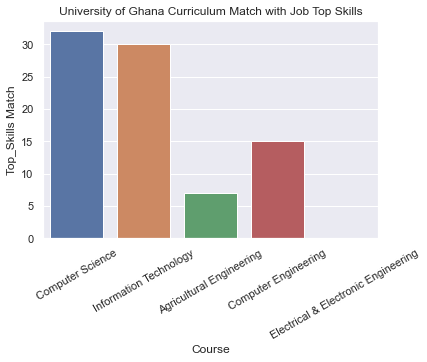

In [67]:
sns.set(style='darkgrid')
sns.barplot(x='Course', y='Top_Skills Match', data=p)

plt.xticks(rotation=30)

# Add labels and title
plt.title('University of Ghana Curriculum Match with Job Top Skills')
plt.xlabel('Course')
plt.ylabel('Top_Skills Match')

# Show plot
plt.show()